# Task 12: Deep Neural Nets

_All credit for the code examples of this notebook goes to the book "Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow" by A. Geron. Modifications were made and text was added S. Korn in preparation for the hands-on sessions_

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Function to save a figure. This also decides that all output files 
# should stored in the subdirectory 'forests'.
PROJECT_ROOT_DIR = "."
EXERCISE = "deep_neural_nets"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", EXERCISE)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", EXERCISE, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## Vanishing/Exploding Gradients Problem

In the lecture you encountered the vanishing and exploding gradients problem. We will now again take a short look at the origin of this problem. Let's start by defining a sigmoid function.

In [3]:
def logit(z):
    return 1 / (1 + np.exp(-z))

Ok let's look at the functional form to discuss the vanishing gradient problem.

Saving figure sigmoid_saturation_plot


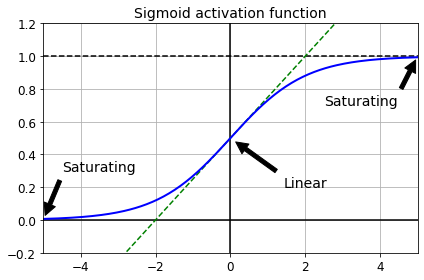

In [4]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("sigmoid_saturation_plot")
plt.show()

## Implementing a non-saturating activation function

One very popular non-saturating activation is the ReLU, except for the problem that it "dies" at its low end. To solve this problem, we can define a "leaky" ReLU, as discussed in the lecture. Can you implement it?

Saving figure leaky_relu_plot


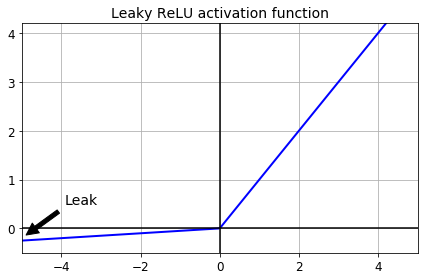

In [7]:
# Implement the leaky ReLU function here.
def leaky_relu(z, alpha=0.01):
    # implement here

# Just to plot the leaking effect.
z = np.linspace(-5, 5, 200)
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot")
plt.show()

Keras provides you with a lot of different activation functions. The following code block will list a few. 

In [23]:
from tensorflow import keras
print("Activation functions: ",[m for m in dir(keras.activations) if not m.startswith("_")])
print("Activation functions as layers: ",[m for m in dir(keras.layers) if "relu" in m.lower()])


Activation functions:  ['deserialize', 'elu', 'exponential', 'get', 'hard_sigmoid', 'linear', 'relu', 'selu', 'serialize', 'sigmoid', 'softmax', 'softplus', 'softsign', 'tanh']
Activation functions as layers:  ['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']


## Activation Functions and Dropout
In the past you have learned how to design a neural network with Keras. Now it is the time to design your own model from scratch. Let's see who can get the best performance on the MNIST dataset.
Use activation functions from the lecture and initialise them with proper initialisation schemes (`kernel_initializer`).

In [24]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [25]:
# design your own model here
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=30)
model.evaluate(X_test, y_test)

Epoch 1/30
55000/55000 [==============================] - 14s 249us/sample - loss: 1.3014 - acc: 0.5962
Epoch 2/30
55000/55000 [==============================] - 13s 243us/sample - loss: 0.7895 - acc: 0.7482
Epoch 3/30
55000/55000 [==============================] - 14s 254us/sample - loss: 0.6753 - acc: 0.7817
Epoch 4/30
55000/55000 [==============================] - 13s 245us/sample - loss: 0.6158 - acc: 0.7991
Epoch 5/30
55000/55000 [==============================] - 14s 255us/sample - loss: 0.5779 - acc: 0.8087
Epoch 6/30
55000/55000 [==============================] - 14s 247us/sample - loss: 0.5514 - acc: 0.8167
Epoch 7/30
55000/55000 [==============================] - 13s 238us/sample - loss: 0.5314 - acc: 0.8211
Epoch 8/30
55000/55000 [==============================] - 13s 244us/sample - loss: 0.5155 - acc: 0.8255
Epoch 9/30
55000/55000 [==============================] - 13s 236us/sample - loss: 0.5025 - acc: 0.8294
Epoch 10/30
55000/55000 [==============================] - 13s 2

[0.4420069694519043, 0.8458]